In [5]:
import osmnx as ox # OSMNX is an awnsome package
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

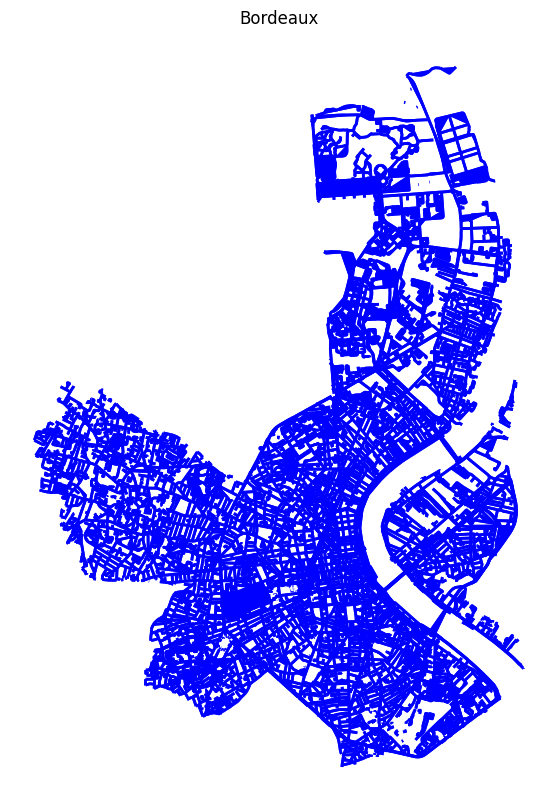

In [4]:
city = input("Enter a city name: ")
place = [city]
gdf_nodes = gdf_edges = None
for place in place:
    G = ox.graph_from_place(place, retain_all=True, simplify=True, network_type='walk')
    n_, e_ = ox.graph_to_gdfs(G)
    n_["place"] = place
    e_["place"] = place
    if gdf_nodes is None:
        gdf_nodes = n_
        gdf_edges = e_
    else:
        gdf_nodes = pd.concat([gdf_nodes, n_])
        gdf_edges = pd.concat([gdf_edges, e_])

#Plot it !
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = {'Bordeaux': 'blue'}
fig = gdf_edges.plot(column="place", cmap=ListedColormap([colors[k] for k in sorted(colors.keys())]), figsize=(10, 10),
alpha=1, linewidth=2, edgecolor='blue', facecolor='orange') # Setting the line color to blue and the background to orange

# plt.suptitle("Sitraka")
plt.title("Bordeaux")
plt.xticks([])
plt.yticks([])
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['left'].set_visible(False)
plt.savefig("Bordeaux.jpg", dpi=600, format="jpg")
plt.show()